In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

First we define a path to the Waldo images, and test out our reading capability.

In [2]:
filepath = os.path.join(os.getcwd(), "wheres-waldo", "wheres-waldo", "Hey-Waldo", "original-images")
filename = os.path.join(filepath, os.listdir(filepath)[0])

In [3]:
img = plt.imread(filename)

Looks like we can successfully read in and display a full "where's waldo" image.

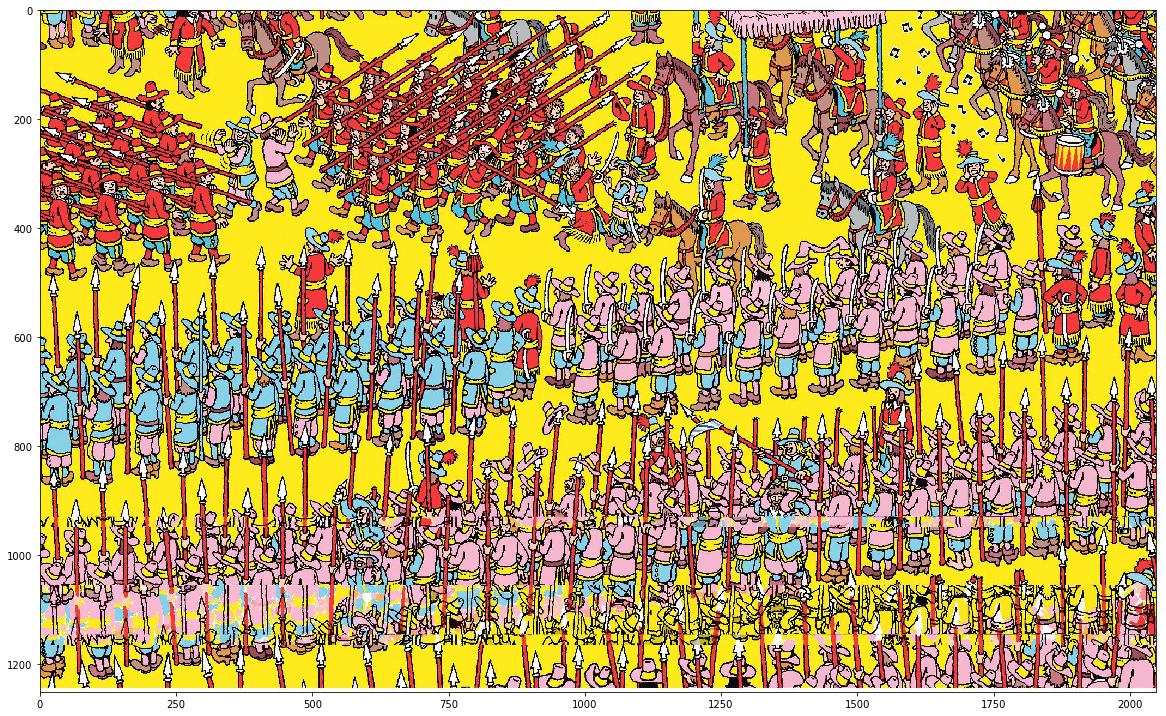

In [4]:
fig, ax = plt.subplots(figsize = (20, 20))
ax.imshow(img)

Now we define a function to let us easily cut out 64x64 pixel images, given the center and original image.

In [6]:
def cutout(img, coords):
    y = [coords[0] - 32, coords[0] + 32]
    x = [coords[1] - 32, coords[1] + 32]
    
    if y[0] < 0:
        y[0] = 0
        y[1] = 64
        
    if y[1] > img.shape[1]:
        y[1] = img.shape[1] - 1
        y[0] = y[1] - 64
      
    if x[0] < 0:
        x[0] = 0
        x[1] = 64
        
    if x[1] > img.shape[0]:
        x[1] = img.shape[0] - 1
        x[0] = x[1] - 64
    
    return img[x[0]:x[1], y[0]:y[1], :]

Let's test it out, given that we know the coordinates of waldo in our example image.

In [7]:
coords = [726, 540]

In [8]:
new_img = cutout(img, coords)
np.size(new_img)

12288

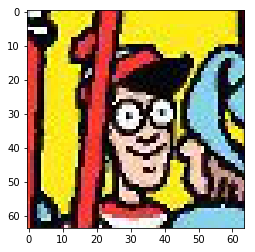

In [9]:
plt.imshow(new_img)

Looks like we found Waldo.

Now we create a function to generate random coordinates which are within ±30 pixels of the original center. This allows us to
generate new 64x64 images which still have Waldo in them, but which are distinct from our already existing images.

In [10]:
from random import randint

In [11]:
def genRandCoords(center):
    border = 30
    x = center[0] + randint(-border, border)
    y = center[1] + randint(-border, border)
    return [x, y]

Let's test our new function.

In [12]:
center = genRandCoords(coords)
cut_img = cutout(img, center)

In [63]:
image = []
for i in range(10):
    center = genRandCoords(coords)
    cut_img = cutout(img, center)
    image.append(cut_img)

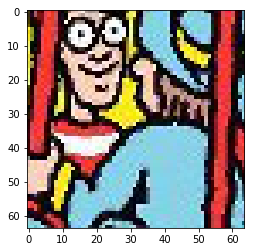

In [68]:
plt.imshow(image[4])

We get an image which still contains Waldo, but is different from our original 64x64 example..

We've created a csv called "waldo_locations" which contains the coordinate locations of all of the waldos in the full size original images. We read this in, and create several images whose centers are near the original waldo location. This, again, allows us to artificially generate new training data without actually acquiring more original images.

In [15]:
csv_name = os.path.join(os.getcwd(), "waldo_locations.csv")

In [16]:
locs = pd.read_csv(csv_name)

Define quick function to save images as numbers.

In [17]:
def saveImage(img, num):
    filename = os.path.join(os.getcwd(), "64", str(num) + ".jpg")
    im = Image.fromarray(img)
    im.save(filename)

Cut out and save artificial data images.

In [18]:
num = 1
filepath = os.path.join(os.getcwd(), "wheres-waldo", "wheres-waldo", "Hey-Waldo", "original-images")
for i in range(20):
    
    x = locs['x'].iloc[i]
    y = locs['y'].iloc[i]
    coords = [x, y]
    
    if coords[0] == 0:
        continue
        
    print(coords)
    
    filename = os.path.join(filepath, str(i + 1) + ".jpg")
    img = plt.imread(filename)
    
    for j in range(50):
        center = genRandCoords(coords)
        cut_img = cutout(img, center)
        saveImage(cut_img, num)
        num = num + 1

[726, 540]
[96, 543]
[1415, 486]
[1498, 296]
[1598, 621]
[1738, 436]
[839, 984]
[1182, 308]
[252, 756]
[474, 1547]
[861, 546]
[938, 283]
[226, 1905]
[305, 440]
[763, 271]
[1281, 96]
[346, 635]
[1431, 744]


Now we read in our images, and store them in a data frame. From there we can save the raw features in a csv file.

In [20]:
w = np.array([np.array(plt.imread(os.getcwd()+"\\64\\"+fname)) for fname in os.listdir(os.getcwd()+"\\64\\")])

In [21]:
data = []
for im in w:
    data.append(im.flatten('F'))

In [22]:
df = pd.DataFrame(data)
df['waldo'] = 1

In [23]:
df.to_csv('waldo_new_2.csv',index=False)